# Google Playstore Case Study

In this module you’ll be learning data visualisation with the help of a case study. This will enable you to understand how visualisation aids you in solving business problems. 

**Problem Statement**

The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the most promising apps. Now, this analysis would require a preliminary understanding of the features that define a well-performing app. You can ask questions like:
- Does a higher size or price necessarily mean that an app would perform better than the other apps? 
- Or does a higher number of installs give a clear picture of which app would have a better rating than others?




### Session 1 - Introduction to Data Visualisation

In [1]:
#import the libraries
import pandas as pd

In [2]:
#read the dataset and check the first five rows
inp0 = pd.read_csv('E:/GIT_Repository/Python/DataVisualisation/Case Study Notebook/googleplaystore_v2.csv')

inp0.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
#Check the shape of the dataframe
inp0.shape

(10841, 13)

### Data Handling and Cleaning

The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage. These aforementioned problems are handled as follows:

The df.info() function showed us that some of the columns (like Rating) have missing values and some have incorrect data types associated with them.

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Imputing the missing values -where you replace the missing value with another estimated value
    - Keep the missing values if they don't affect the analysis
 
    
 - Incorrect Data Types:
 
This discrepancy mostly occurs due to some incorrect entry in the column which is stored in a format other than the desired one due to which the entire column gets misclassified. Or in some other cases, the format of the entire column is different from what we need for our analysis purposes. You either have to fix certain values or clean the entire column only to bring it to the correct format
 
    - Clean certain values 
    - Clean and convert an entire column
 

In [4]:
#Check the datatypes of all the columns of the dataframe
inp0.info()
#Rating,current version,Android ver,Type,Content Rating have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


#### Missing Value Treatment

In [5]:
#Check the number of null values in the columns
inp0.isnull().sum()


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Handling missing values for rating
 - Ratings is the target variable
 - drop the records

In [6]:
#Drop the rows having null values in the Rating field
#inp1 = inp0[~inp0['Rating'].isnull()]
#or
inp1 = inp0[~inp0.Rating.isnull()]
#Check the shape of the dataframe
inp1.shape


(9367, 13)

In [7]:
# Check the number of nulls in the Rating field again to cross-verify
inp1.Rating.isnull().sum()

0

In [8]:
#Question
#Check the number of nulls in the dataframe again and find the total number of null values
sum(inp1.isnull().sum())
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [9]:
#Inspect the nulls in the Android Version column
inp1[inp1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [10]:
#Totally there are 3 columns which has null values. Analyse it
#Drop the row having shifted values - Last row has a shifted values. Value of the Type column has been moved to Installs and it 
#happened for the next consecutive column too.
#Do not hard code - by deleting with index 10472
#~ - except the row which satisfies the condition it will fetch the remaining other rows
inp1 = inp1[~((inp1['Android Ver'].isnull()) & (inp1['Category'] == "1.9"))]

#Check the nulls again Android version column to cross-verify
inp1[inp1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


Imputing Missing Values

- For numerical variables use mean and median
- For categorical variables use mode

In [11]:
#Android Ver -  is a categorical value. So we can use mode() or value_counts()
#value_counts() - The value_counts() function is used to get a Series containing counts of unique values
#mode() to find the common value for the column or in the entire dataframe

In [12]:
#Check the most common value in the Android version column. value_counts() - The value_counts() function is 
#used to get a Series containing counts of unique values.
inp1['Android Ver'].value_counts()

4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
5.0 - 8.0                2
1.0 and up               2
4.0.3 - 7.1.1            2
4.1 - 7.1.1              1
7.0 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

In [13]:
#We can also use mode() to find the common value for the column 'Android Ver'
inp1['Android Ver'].mode()[0]


'4.1 and up'

In [14]:
#Fill up the nulls in the Android Version column with the above value - use fillna replace NaN values with some value 
inp1['Android Ver'] = inp1["Android Ver"].fillna(inp1['Android Ver'].mode()[0])


In [15]:
#Now the count for '4.1 and up' has been incremented by 2. As we have changed to NaN columns with '4.1 and up'
inp1['Android Ver'].value_counts()

4.1 and up            2061
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
5.0 - 8.0                2
1.0 and up               2
4.0.3 - 7.1.1            2
4.1 - 7.1.1              1
7.0 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

In [16]:
#Check the nulls in the Android version column again to cross-verify
inp1['Android Ver'].isnull().sum()

0

In [17]:
#Check the nulls in the entire dataframe again
inp1.isnull().sum()
#Now, Current Ver has Null values.


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [18]:
inp1[inp1['Current Ver'].isnull()]
#Check the most common value in the Current version column
inp1['Current Ver'].mode()[0] 
#or
inp1['Current Ver'].value_counts()

Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.5a                     1
2.9.18                   1
1.0.70                   1
3.1.0.1126               1
3.61                     1
Name: Current Ver, Length: 2638, dtype: int64

In [19]:
#Replace the nulls in the Current version column with the above value
inp1['Current Ver'] = inp1['Current Ver'].fillna(inp1['Current Ver'].mode()[0])


In [20]:
# Question : Check the most common value in the Current version column again.
#Now the count for 'Varies with device' has been incremented by 4. As we have changed to NaN columns with 'Varies with device'
inp1['Current Ver'].value_counts()

Varies with device    1419
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.5a                     1
2.9.18                   1
1.0.70                   1
3.1.0.1126               1
3.61                     1
Name: Current Ver, Length: 2638, dtype: int64

#### Handling Incorrect Data Types 

Mean
What is the average Price for all the apps which have the Android version as “4.1 and up” ?

If you recall the earlier modules where you learnt about data types available in python, you know that aggregations like average, sum or mean cannot be performed on character variables or strings. Only numeric datatypes like float or int would allow you to calculate those values. 

The datatype of Price is 'Object'(test.dtypes).So Convert it into Integer using to_numeric. errors='coerce' - By setting errors=’coerce’, you’ll transform the non-numeric values into NaN.

In [21]:
test = inp1[inp1['Android Ver'] == '4.1 and up']
test
#test['Price'].mean()
test['Price'] = pd.to_numeric(test['Price'], errors='coerce')
(test.dtypes)
test['Price'].mean()
#test[test['Price'] >0]

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0.0

In [22]:
#Check the datatypes of all the columns 
inp1.dtypes


App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [23]:
#Analyse the Price column to check the issue
inp1.Price.value_counts().head(100)
#It has a '$' infront. We need to remove it.



0         8719
$2.99      114
$0.99      107
$4.99       70
$1.99       59
          ... 
$2.90        1
$3.88        1
$4.84        1
$15.46       1
$2.00        1
Name: Price, Length: 73, dtype: int64

In [24]:
#Write the function to make the changes If it has '0' populate it with '0' else fetch value only from 1st position
#(i.e).exclude the '$' symbol from each value.
inp1.Price = inp1.Price.apply(lambda x: 0 if x == "0" else float(x[1:]))


In [25]:
#Verify the dtype of Price once again
inp1.Price.dtypes

dtype('float64')

In [26]:
#'$' has been removed
inp1.Price.value_counts()

0.00      8719
2.99       114
0.99       107
4.99        70
1.99        59
          ... 
299.99       1
1.59         1
1.61         1
3.90         1
2.90         1
Name: Price, Length: 73, dtype: int64

In [27]:
#Analyse the Reviews column
inp1.Reviews.value_counts()


2         83
3         78
4         74
5         74
1         67
          ..
911995     1
344921     1
36028      1
3371       1
43935      1
Name: Reviews, Length: 5992, dtype: int64

In [28]:
#Change the dtype of this column
inp1.Reviews = inp1.Reviews.astype("int32")

#Check the quantitative spread of this dataframe
inp1.Reviews.describe()


count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [29]:
#Analyse the Installs Column
#inp1.info()
inp1['Installs'].value_counts()
#'Installs' coulmn has ',' and '+'. We need to remove those

1,000,000+        1577
10,000,000+       1252
100,000+          1150
10,000+           1010
5,000,000+         752
1,000+             713
500,000+           538
50,000+            467
5,000+             432
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

In [30]:
#Question Clean the Installs Column and find the approximate number of apps at the 50th percentile.

inp1['Installs']
inp1['Installs'] = (inp1['Installs'].str.replace(',', '')).str.replace('+', '')
#inp1[Installs]
inp1.Installs = inp1.Installs.astype("int32")

 


In [31]:
inp1['Installs'].describe()
#inp1['Installs'].quantile(0.5)

count    9.366000e+03
mean     1.789744e+07
std      9.123822e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

#### Sanity Checks

The data that we have needs to make sense and therefore you can perform certain sanity checks on them to ensure they are factually correct as well. Some sanity checks can be:

- Rating is between 1 and 5 for all the apps.
- Number of Reviews is less than or equal to the number of Installs.
- Free Apps shouldn’t have a price greater than 0.


In [32]:
#Perform the sanity checks on the Rating column (i.e) Rating is between 1 and 5 for all the apps
inp1.Rating.describe()
#Here the min value is 1 and max value is 5. So all the values of the Range column lies in the between 1 and 5.

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [33]:
#Perform the sanity checks on the Reviews column (i.e)Number of Reviews should be less than or equal to the number of Installs.
inp1[inp1['Reviews'] > inp1['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [34]:
#There are 7 records which has review greater than Installs. Drop these records.
inp1 = inp1[~(inp1['Reviews'] > inp1['Installs'])]
inp1


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [35]:
#perform the sanity checks on prices of free apps(i.e) Free Apps shouldn’t have a price greater than 0. 
inp1[~(inp1['Type'] == "Free") & (inp1['Price'] == 0)].shape
#There is no apps which has Price greater than 0 and its Type is 'Free'



(0, 13)

#### Outliers Analysis Using Boxplot

Now you need to start identifying and removing extreme values or __outliers__ from our dataset. These values can tilt our analysis and often provide us with a biased perspective of the data available. This is where you’ll start utilising visualisation to achieve your tasks. And the best visualisation to use here would be the box plot. Boxplots are one of the best ways of analysing the spread of a numeric variable


Using a box plot you can identify the outliers as follows:

![BoxPlots to Identify Outliers](images\Boxplot.png)

- Outliers in data can arise due to genuine reasons or because of dubious entries. In the latter case, you should go ahead and remove such entries immediately. Use a boxplot to observe, analyse and remove them.
- In the former case, you should determine whether or not removing them would add value to your analysis procedure.

- You can create a box plot directly from pandas dataframe or the matplotlib way as you learnt in the previous session. Check out their official documentation here:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
   - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

In [36]:
#import the plotting libraries
import matplotlib.pyplot as p
%matplotlib inline

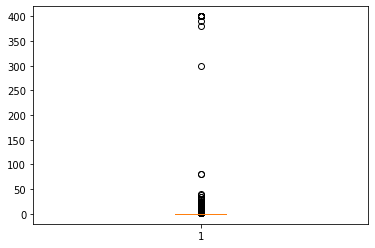

In [37]:
#Create a box plot for the price column
p.boxplot(inp1["Price"]) 
p.show()

In [38]:
#Check the apps with price more than 200 As per the boxplot, everything got compressed and there are more outliers. There are outliers 
#which is very far away (i.e) near 400.So lets check the apps that have price more than 200.
inp1[inp1.Price>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [39]:
#Clean the Price column
#Based on the App name in the previous result we found that it seems to be a junk app and some have 10000 installs. 
#So we can remove those data
inp1 = inp1[inp1.Price<200]
inp1.Price.describe()


count    9344.000000
mean        0.334463
std         2.169925
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        79.990000
Name: Price, dtype: float64

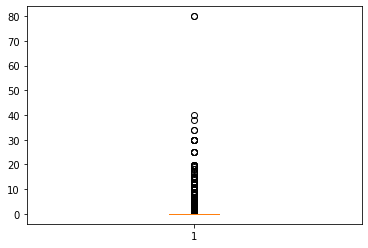

In [40]:
#Create a box plot for paid apps
p.boxplot(inp1["Price"]) 
p.show()


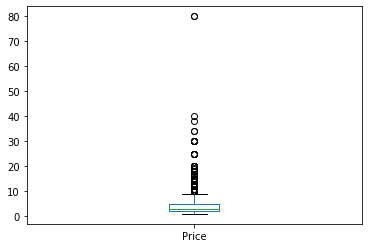

In [41]:
#There are free apps whose price is '0'. So lets check the apps with price more than 0
inp1[inp1.Price>0].Price.plot.box()
#

In [42]:
#There are outliers from 30
#Check the apps with price more than 30 
inp1[inp1.Price>30]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2301,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2402,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2414,LTC AS Legal,MEDICAL,4.0,6,1300.0,100,Paid,39.99,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up
5360,I am Rich Person,LIFESTYLE,4.2,134,1800.0,1000,Paid,37.99,Everyone,Lifestyle,"July 18, 2017",1.0,4.0.3 and up


In [43]:
#Analysis - Price are more than 30 so we can clean up those. There is also repitition in the App 'Vargo Anesthesia Mega App'
#and 'A Manual of Acupuncture'
#Clean the Price column again
inp1 = inp1[inp1.Price<30]
inp1.shape


(9338, 13)

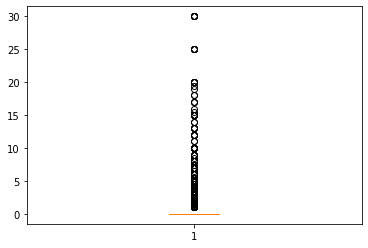

In [44]:
p.boxplot(inp1["Price"]) 
p.show()

### Histograms

Histograms can also be used in conjuction with boxplots for data cleaning and data handling purposes. You can use it to check the spread of a numeric variable. Histograms generally work by bucketing the entire range of values that a particular variable takes to specific __bins__. After that, it uses vertical bars to denote the total number of records in a specific bin, which is also known as its __frequency__.


![Histogram](images\Histogram.png)

You can adjust the number of bins to improve its granularity

![Bins change](images\Granular.png)

You'll be using plt.hist() to plot a histogram. Check out its official documentation:https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html

In [45]:
inp1["Reviews"].value_counts()

2         81
3         78
5         74
4         73
1         67
          ..
624924     1
33053      1
4383       1
43296      1
739329     1
Name: Reviews, Length: 5988, dtype: int64

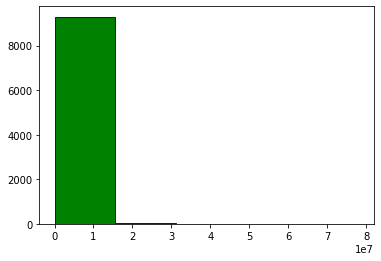

In [46]:
#Create a histogram of the Reviews
import numpy as np
import matplotlib.pyplot as p
p.hist(inp1["Reviews"],color = 'green',edgecolor = 'blue',bins=5)
p.show()

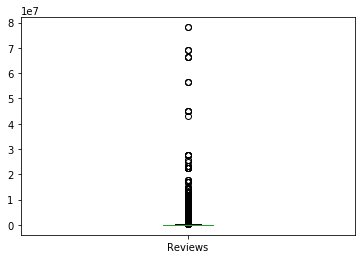

In [47]:
#Create a boxplot of the Reviews column

inp1.Reviews.plot.box()



In [48]:
#Check records with 1 million reviews (1e7 is 10^6)
inp1[inp1.Reviews>=10000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,21516.529524,500000000,Free,0.0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40000.000000,500000000,Free,0.0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6449,BBM - Free Calls & Messages,COMMUNICATION,4.3,12843436,21516.529524,100000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,4.0.3 and up
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,21516.529524,500000000,Free,0.0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device
7937,Shadow Fight 2,GAME,4.6,10981850,88000.000000,100000000,Free,0.0,Everyone 10+,Action,"July 2, 2018",1.9.38,3.0 and up
8894,Cache Cleaner-DU Speed Booster (booster & clea...,TOOLS,4.5,12759815,15000.000000,100000000,Free,0.0,Everyone,Tools,"July 25, 2018",3.1.2,4.0 and up


In [49]:
#Analysis - Records has more reviews also they have more number of Installs. They are in mega success group. Our motive is to
#boost the visibility of the app.Eg. Whatsapp Messenger and Viber Messenger are already have good Installs. So we can remove those
#apps and we can give importance to the apps that needs more attention
#Drop the above records
inp1 = inp1[inp1["Reviews"]<1000000]
inp1.shape



(8634, 13)

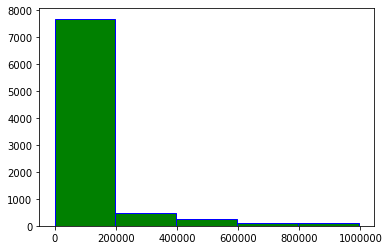

In [50]:
#Question - Create a histogram again and check the peaks
p.hist(inp1["Reviews"],color = 'green',edgecolor = 'blue',bins = 5)
p.show()


In [51]:
#Question - Create a box plot for the Installs column and report back the IQR
#inp1.Installs.plot.box()
(inp1.Installs.describe())
Q1 = inp1['Installs'].quantile(0.25)
Q3 = inp1['Installs'].quantile(0.75)
IQR = Q3 - Q1
IQR


990000.0

In [52]:
#Question - CLean the Installs by removing all the apps having more than  100 million installs
inp1 = (inp1[inp1['Installs'] <= 100000000])
inp1.shape

(8624, 13)

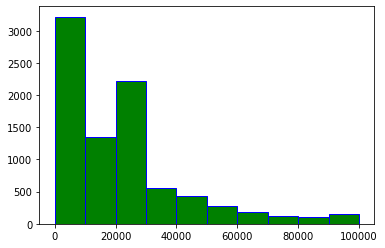

In [53]:
#Plot a histogram for Size as well.
p.hist(inp1["Size"],color = 'green',edgecolor = 'blue')
p.show()

count      8624.000000
mean      21634.926354
std       20668.248638
min           8.500000
25%        6000.000000
50%       18000.000000
75%       26000.000000
max      100000.000000
Name: Size, dtype: float64

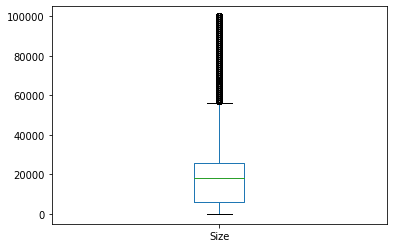

In [54]:
#Question - Create a boxplot for the Size column and report back the median value
inp1.Size.plot.box()
inp1.Size.describe()

### Session 2 - Data Visualisation with Seaborn

Seaborn is Python library to create statistical graphs easily. It is built on top of matplotlib and closely integrated with pandas.

_Functionalities of Seaborn_ :

- Dataset oriented API
- Analysing univariate and bivariate distributions
- Automatic estimation and plotting of  linear regression models
- Convenient views for complex datasets
- Concise control over style
- Colour palettes


In [55]:
#import the necessary libraries
import warnings
warnings.filterwarnings('ignore')


#### Distribution Plots

A distribution plot is pretty similar to the histogram functionality in matplotlib. Instead of a frequency plot, it plots an approximate probability density for that rating bucket. And the curve (or the __KDE__) that gets drawn over the distribution is the approximate probability density curve. 

The following is an example of a distribution plot. Notice that now instead of frequency on the left axis, it has the density for each bin or bucket.

![Distplot](images\Distplot.png)

You'll be using sns.distplot for plotting a distribution plot. Check out its official documentation: https://seaborn.pydata.org/generated/seaborn.distplot.html

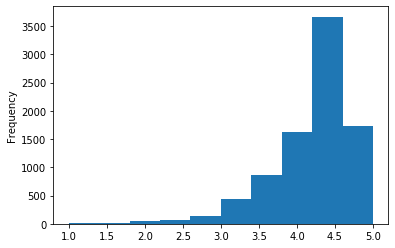

In [56]:
#plot in Histogram
inp1.Rating.plot.hist()
p.show()

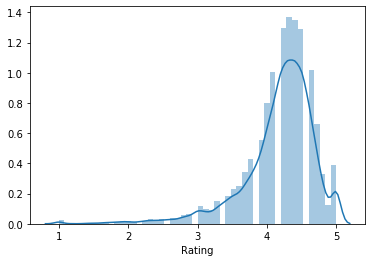

In [57]:
#Create a distribution plot for rating
import seaborn as sns
sns.distplot(inp1.Rating)

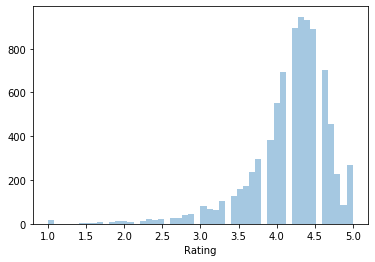

In [58]:
#To avoid Probability distribution curve
sns.distplot(inp1.Rating,kde = False)

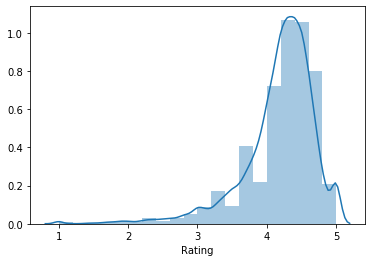

In [59]:
#Change the number of bins

sns.distplot(inp1.Rating,bins = 20)

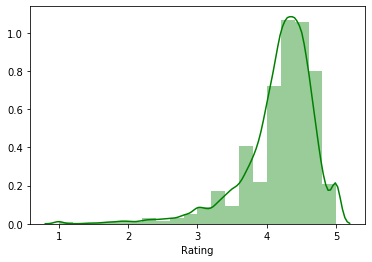

In [60]:
#Change the colour of bins to green
sns.distplot(inp1.Rating,bins = 20,color = 'g')

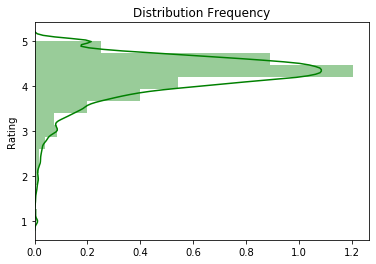

In [61]:
#Apply matplotlib functionalities
sns.distplot(inp1.Rating,bins = 15,color = 'g',vertical = True)
p.title("Distribution Frequency")
p.show()


#### Styling Options

One of the biggest advantages of using Seaborn is that you can retain its aesthetic properties and also the Matplotlib functionalities to perform additional customisations. Before we continue with our case study analysis, let’s study some styling options that are available in Seaborn.

-  Check out the official documentation:https://seaborn.pydata.org/generated/seaborn.set_style.html

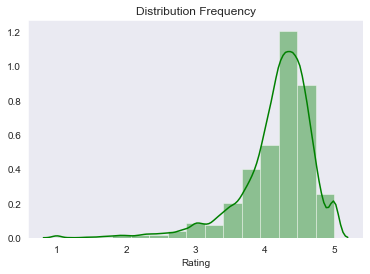

In [62]:
#Check all the styling options
sns.set_style("dark")
sns.distplot(inp1.Rating,bins = 15,color = 'g')
p.title("Distribution Frequency")
p.show()

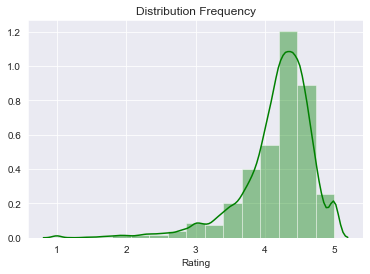

In [63]:
#Check all the styling options
#white, dark, whitegrid, darkgrid, ticks
sns.set_style("darkgrid")
sns.distplot(inp1.Rating,bins = 15,color = 'g')
p.title("Distribution Frequency")
p.show()

In [64]:
p.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

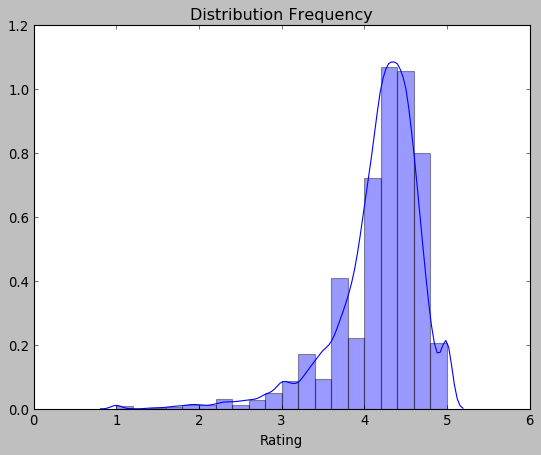

In [65]:
p.style.use("_classic_test")
sns.distplot(inp1.Rating,bins = 20)
p.title("Distribution Frequency")
p.show()

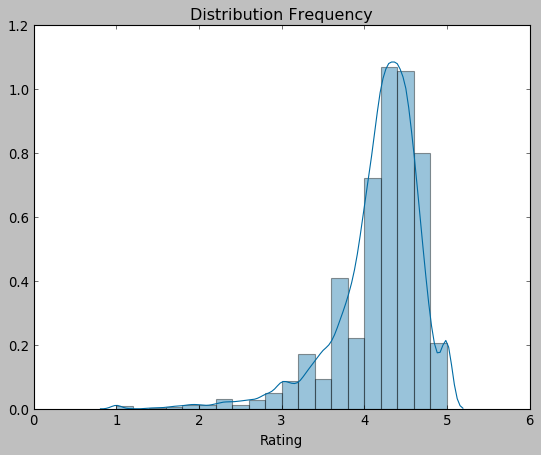

In [66]:
p.style.use("tableau-colorblind10")
sns.distplot(inp1.Rating,bins = 20)
p.title("Distribution Frequency")
p.show()

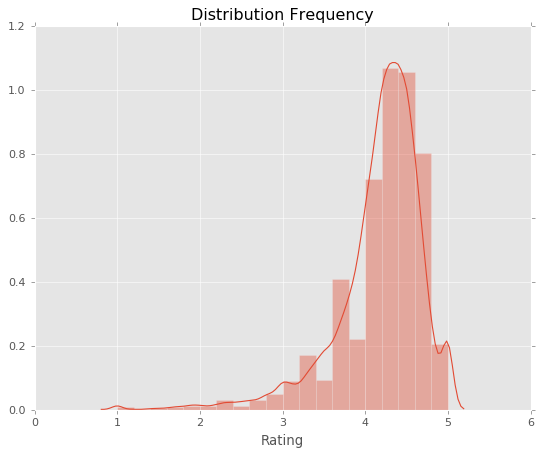

In [67]:
p.style.use("ggplot")
sns.distplot(inp1.Rating,bins = 20)
p.title("Distribution Frequency")
p.show()

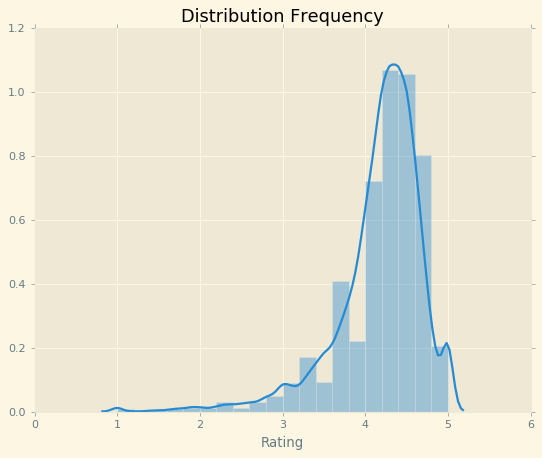

In [68]:
p.style.use("Solarize_Light2")
sns.distplot(inp1.Rating,bins = 20)
p.title("Distribution Frequency")
p.show()


In [69]:
#Reset all the above setting and go back to default
p.style.use("default")
%matplotlib inline


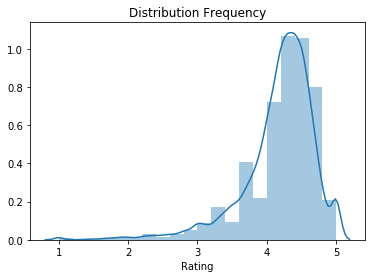

In [70]:
sns.distplot(inp1.Rating,bins = 20)
p.title("Distribution Frequency")
p.show()

#### Pie-Chart and Bar Chart

For analysing how a numeric variable changes across several categories of a categorical variable you utilise either a pie chart or a box plot

For example, if you want to visualise the responses of a marketing campaign, you can use the following views:

![PieChart](images\pie.png)

![barChart](images\bar.png)

- You'll be using the pandas method of plotting both a pie chart and a bar chart. Check out their official documentations:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html

In [71]:
#Analyse the Content Rating column
inp1['Content Rating'].value_counts()

Everyone           6938
Teen                928
Mature 17+          417
Everyone 10+        337
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [72]:
#Remove the rows with values which are less represented 
# Adults only 18+ and Unrated have just 4 records. So we can remove it
inp1 = inp1[~inp1['Content Rating'].isin(["Adults only 18+",'Unrated'])]
inp1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [73]:
#Reset the index


In [74]:
#Check the apps belonging to different categories of Content Rating 


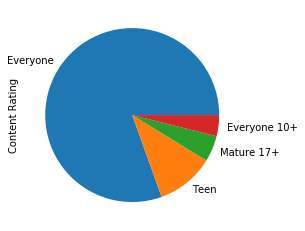

In [75]:
#Plot a pie chart
inp1['Content Rating'].value_counts().plot.pie()
p.show()

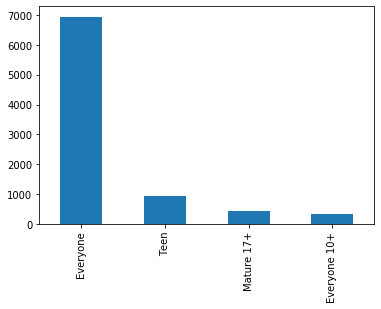

In [76]:
#Plot a bar chart
inp1['Content Rating'].value_counts().plot.bar()
p.show()

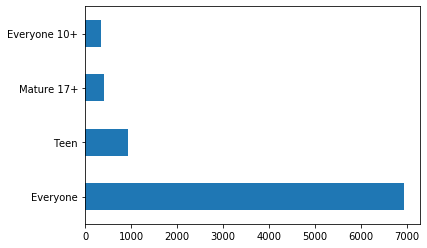

In [77]:
#Horizontal Bar Chart
#Plot a bar chart
inp1['Content Rating'].value_counts().plot.barh()
p.show()

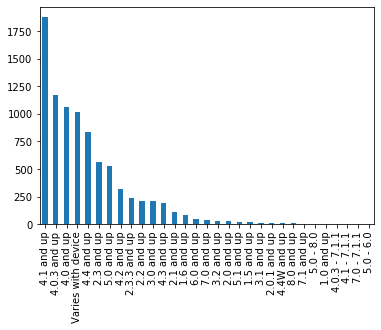

In [78]:
#Question - Plot a bar plot for checking the 4th highest Android version type
inp1['Android Ver'].value_counts().plot.bar()
p.show()

#### Scatter Plots

Scatterplots are perhaps one of the most commonly used as well one of the most powerful visualisations you can use in the field of machine learning. They are pretty crucial in revealing relationships between the data points and you can generally deduce some sort of trends in the data with the help of a scatter plot. 

![Scatterplot](images\scatter.png)

- They're pretty useful in regression problems to check whether a linear trend exists in the data or not. For example, in the image below, creating a linear model in the first case makes far more sense since a clear straight line trend is visible.

![Scatterplot-Reg](images\regression3.png)

- Also, they help in observing __naturally occuring clusters__. In the following image, the marks of students in Maths and Biology has been plotted.You can clearly group the students to 4 clusters now. Cluster 1 are students who score very well in Biology but very poorly in Maths, Cluster 2 are students who score equally well in both the subjects and so on.

![Scatter-Clusters](images\Clusters.png)

**Note**: You'll be studying about both Regression and Clustering in greater detail in the machine learning modules

You'll be using **sns.jointplot()** for creating a scatter plot. Check out its documentation:
https://seaborn.pydata.org/generated/seaborn.jointplot.html

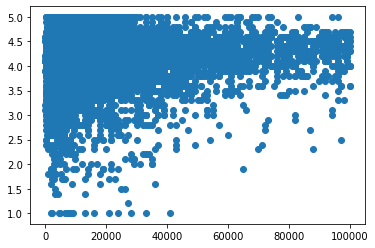

In [79]:
###Size vs Rating
##Plot a scatter-plot in the matplotlib way between Size and Rating
p.scatter(inp1.Size,inp1.Rating)
p.show()

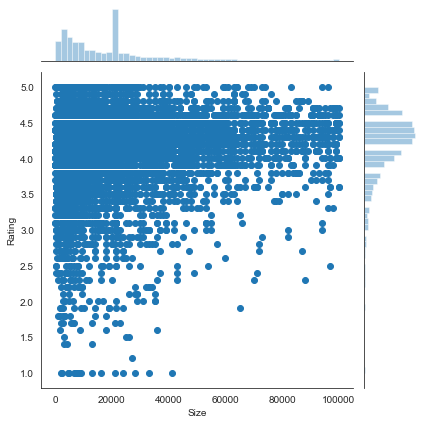

In [80]:
#Plot using Seaborn
sns.set_style("white")
sns.jointplot(inp1.Size,inp1.Rating)
p.show()

In [81]:
#Important Note - In newer versions of seaborn, the Pearson r and the p  metrics may not be visible since 
#they have been deprecated. As a workaround, you would have to annotate those values manually by importing 
#the scipy.stats library and passing an additional parameter called stat_func in the jointplot code. 
#Please check the code below to get a  better understanding

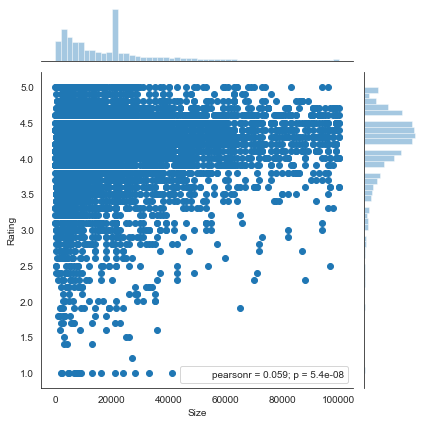

In [82]:
#Import this library
import scipy.stats as stats

#Change the code to the following
sns.jointplot(inp1.Size, inp1.Rating, stat_func = stats.pearsonr)


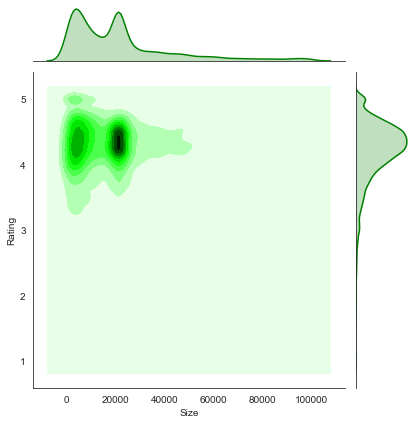

In [83]:
sns.jointplot(inp1.Size, inp1.Rating, kind = 'kde',color = 'g')


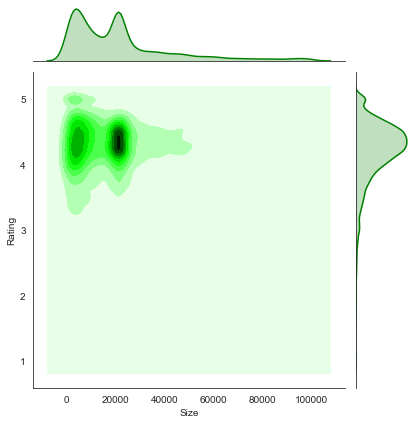

In [84]:
sns.jointplot(inp1.Size, inp1.Rating, kind = 'kde',color = 'G')

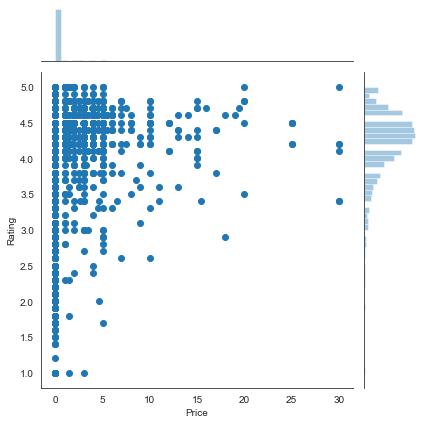

In [85]:
## Plot a jointplot for Price and Rating
sns.jointplot(inp1.Price, inp1.Rating)
p.show()

**Reg Plots**

- These are an extension to the jointplots, where a regression line is added to the view 

In [86]:
inp1.Price.describe()

count    8620.000000
mean        0.325441
std         1.732718
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        29.990000
Name: Price, dtype: float64

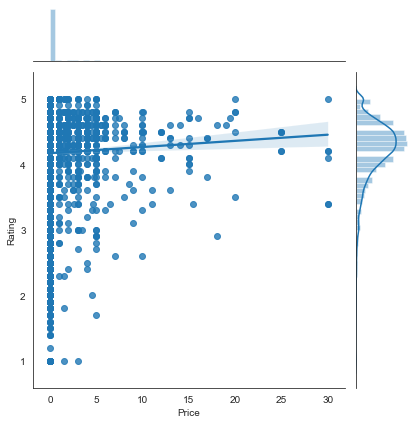

In [87]:
##Plot a reg plot for Price and Rating and observe the trend
sns.jointplot(inp1.Price, inp1.Rating,kind="reg")
#sns.kdeplot(inp1.Price, cumulative=True, bw=1.5)
p.show()


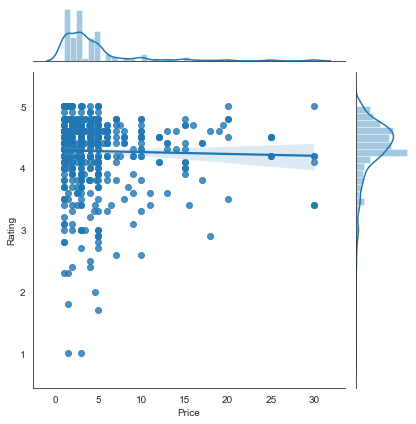

In [88]:
## Question - Plot a reg plot for Price and Rating again for only the paid apps.
sns.jointplot(inp1[inp1['Type'] != 'Free'].Price, inp1[inp1['Type'] != 'Free'].Rating,kind="reg")
p.show()

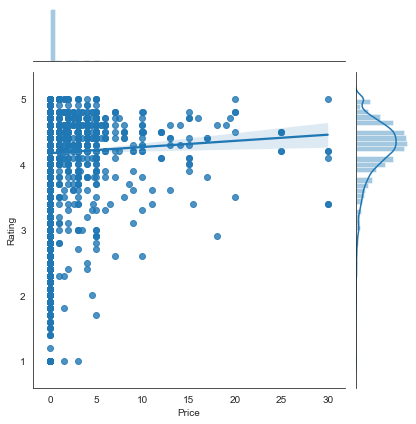

In [89]:
## Question - Plot a reg plot for Price and Rating again for only the paid apps.
#Another way of implementing
sns.jointplot(inp1.Price, inp1.Rating,data = inp1[inp1.Price > 0 ],kind="reg")
p.show()

**Pair Plots**

 - When you have several numeric variables, making multiple scatter plots becomes rather tedious. Therefore, a pair plot visualisation is preferred where all the scatter plots are in a single view in the form of a matrix
 - For the non-diagonal views, it plots a **scatter plot** between 2 numeric variables
 - For the diagonal views, it plots a **histogram** (Reviews-Reviews,Size-Size,Price-Price,Rating-Rating)
 

Pair Plots help in identifying the trends between a target variable and the predictor variables pretty quickly. For example, say you want to predict how your company’s profits are affected by three different factors. In order to choose which you created a pair plot containing profits and the three different factors as the variables. Here are the scatterplots of profits vs the three variables that you obtained from the pair plot.

![Pairplots](images\pairplots2.png)

It is clearly visible that the left-most factor is the most prominently related to the profits, given how linearly scattered the points are and how randomly scattered the rest two factors are.

You'll be using **sns.pairplot()** for this visualisation. Check out its official documentation:https://seaborn.pydata.org/generated/seaborn.pairplot.html

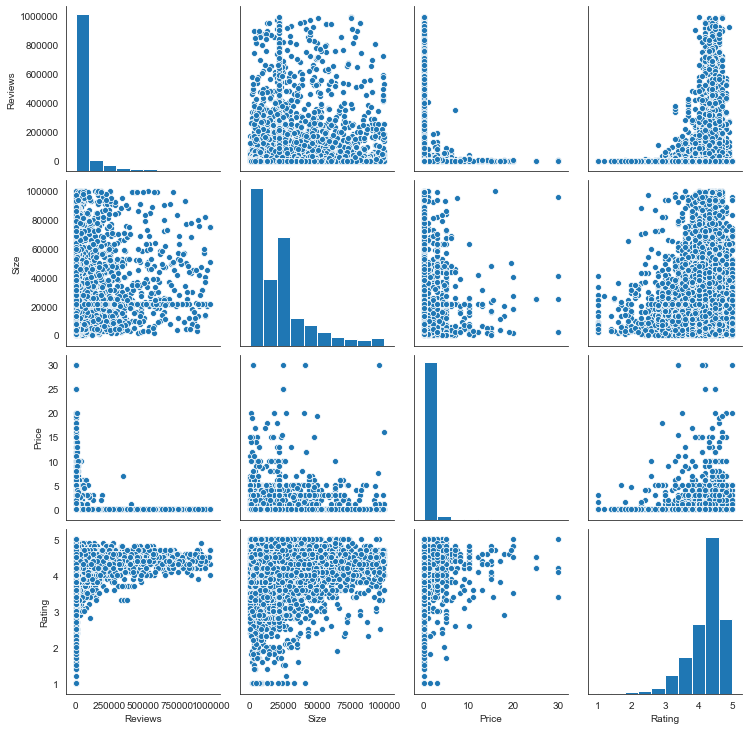

In [90]:
## Create a pair plot for Reviews, Size, Price and Rating
sns.pairplot(inp1[['Reviews','Size','Price','Rating']])
p.show()


*****Application in Machine Learning*****
Pairplots instantly give you the relationship between one numeric variable with the rest of the numeric variables. 
This is pretty useful in identifying relationships between the target variable and the rest of the features.
For example, say you want to predict how your company’s sales are affected by budgets allocated to three different
types of advertisement channels - TV, Newspaper and Radio. In order to choose, you need to create a pair plot 
containing profits and the three different budgets as the variables. 
Let's say the scatterplots of profits vs the three variables that you obtained from the pair plot are as follows 


**Bar Charts Revisited**

- Here, you'll be using bar charts once again, this time using the **sns.barplot()** function. Check out its official documentation:https://seaborn.pydata.org/generated/seaborn.barplot.html
- You can modify the **estimator** parameter to change the aggregation value of your barplot

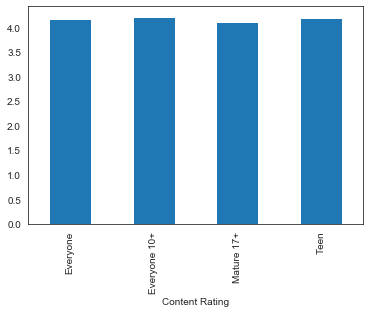

In [91]:
##Plot a bar plot of Content Rating vs Average Rating 
inp1.groupby(['Content Rating'])['Rating'].mean().plot.bar()
p.show()

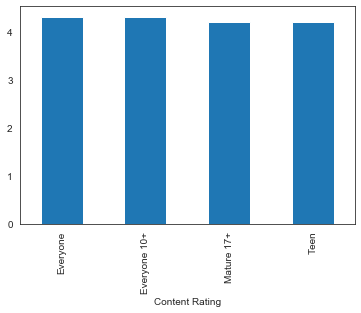

In [92]:
##Plot the bar plot again with Median Rating
inp1.groupby(['Content Rating'])['Rating'].median().plot.bar()
p.show()

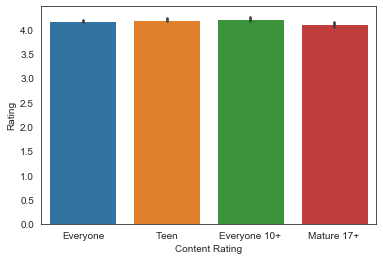

In [93]:
#Plot the same bar graph using seaborn By default it will plot with average (mean)
sns.barplot(data = inp1,x = 'Content Rating',y = 'Rating')
p.show()

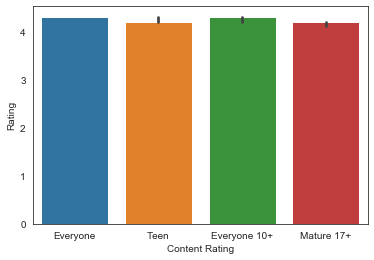

In [94]:
##Plot the above bar plot using the estimator parameter for median
sns.barplot(data = inp1,x = 'Content Rating',y = 'Rating',estimator = np.median)
p.show()

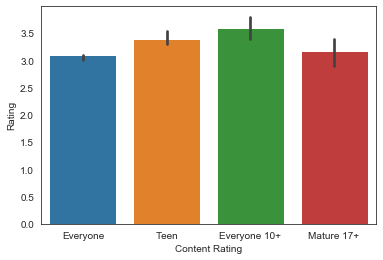

In [95]:
##Plot the bar plot with only the 5th percentile of Ratings
#Estimator ->show the distribution of values at each level of the categorical variables
sns.barplot(data = inp1,x = 'Content Rating',y = 'Rating',estimator = lambda x:np.quantile(x,0.05))
p.show()

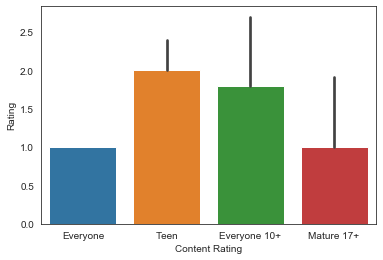

In [96]:
##Question - Plot the bar plot with the minimum Rating
#Change the estimator function in the graph above to analyse minimum Rating for each of the different categories of 
#‘Content Rating’. Which category has the highest minimum rating?
 
sns.barplot(data = inp1,x = 'Content Rating',y = 'Rating',estimator = np.min)
p.show()

__Box Plots Revisited__

- Apart from outlier analysis, box plots are great at comparing the spread and analysing a numerical variable across several categories
- Here you'll be using **sns.boxplot()** function to plot the visualisation. Check out its documentation: https://seaborn.pydata.org/generated/seaborn.boxplot.html

Now, you must be wondering, rather than observing at specific percentiles, why not visualise the entire spread of ratings for each category using a box plot?




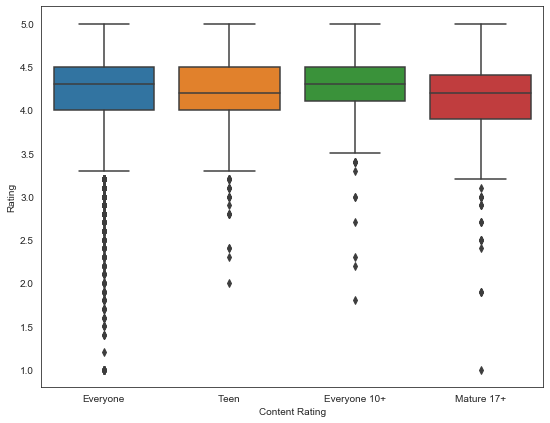

In [97]:

##Plot a box plot of Rating vs Content Rating
p.figure(figsize = [9,7])
sns.boxplot(inp1["Content Rating"],inp1.Rating)
p.show()

Here, you get a bird’s eye view of the spread of ratings for the different categories: median, 75th percentiles, fences, etc. The immediate insight that you obtained from the above view are:

That “Everyone” category has the highest number of ratings in the lower percentiles as compared to the other categories.
The median values are all comparable, which was discovered in the previous views as well.
The upper fences for all the categories get capped at 5.0, whereas there are some observable differences in the lower fences.

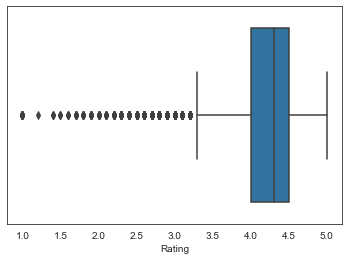

In [98]:
##Question - Plot a box plot for the Rating column only
#Capping Plot a boxplot for the Rating column. The lower fence gets capped between
#ANSWER - 3.0 to 3.5
sns.boxplot(inp1.Rating)
p.show()

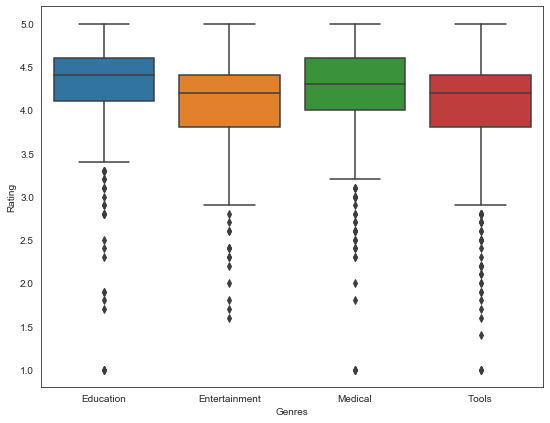

In [99]:
##Question - Plot a box plot of Ratings across the 4 most popular Genres
inp1['Genres'].value_counts()
a = inp1[(inp1['Genres'] == 'Tools') | (inp1['Genres'] == 'Entertainment') | (inp1['Genres'] == 'Education') | (inp1['Genres'] == 'Medical')]
p.figure(figsize = [9,7])
sns.boxplot(a["Genres"],a.Rating)
p.show()

Additional Notes

In the first use case of box plots, you observed how they can be used to identify and remove outliers from the data. In this segment, you understood how box plots can enable you to analyse a numerical variable across several categories. These two are the most prominent use cases of box plots that you’ll be encountering from time to time as you proceed in this program.
As you saw in the video, utilising the groupby function, the bar graph can be used to compare the mean, median, sum and several other metrics.

#### Heat Maps

Heat maps utilise the concept of using colours and colour intensities to visualise a range of values. You must have seen heat maps in cricket or football broadcasts on television to denote the players’ areas of strength and weakness.

![HeatMap](images\heatmap1.png)

- In python, you can create a heat map whenever you have a rectangular grid or table of numbers analysing any two features

![heatmap2](images\heatmap2.png)

- You'll be using **sns.heatmap()** to plot the visualisation. Checkout its official documentation :https://seaborn.pydata.org/generated/seaborn.heatmap.html

Prepare a bucket for the Size column as it has numerical data. We dont need to create bucket for 'Content Rating' as it is a 
categorical variable

Percentile Range 	Binned Category
(0,20)	            Very Low (VL)
(20,40)	            Low(L)
(40,60)	            Medium (M)
(60,80)	            High(H)
(80,100)	        Very High(VH)

In [100]:
##Ratings vs Size vs Content Rating
##Prepare buckets for the Size column using pd.qcut
inp1["Size Bucket"] = pd.qcut(inp1.Size,[0,0.2,0.4,0.6,0.8,1],['VL','L','M','H','VH'])
inp1

        

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size Bucket
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,M
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,M
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,L
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,H
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,VL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,VL
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,VH
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,VL
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,M


In [101]:
inp1['Size Bucket']

0         M
1         M
2         L
3         H
4        VL
         ..
10834    VL
10836    VH
10837    VL
10839     M
10840     M
Name: Size Bucket, Length: 8620, dtype: category
Categories (5, object): [VL < L < M < H < VH]

We need to create rectangular grid for plotting heat maps. First,lets create a rectangular grid between Size Bucket and Content Rating. For that use pivot table


In [102]:
##Create a pivot table for Size_buckets and Content Rating with values set to Rating
#Syntax: data = represents the dataframe. Rows and columns can be either 'Content Rating' and 'Size Bucket'. Here 
#Rows(i.e) Index is Content Rating and columns is Size Bucket and values are set to Rating on which the aggfunc is performed

pd.pivot_table(data = inp1,index = 'Content Rating',columns = 'Size Bucket',values = 'Rating')

Size Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.117536,4.158405,4.215784,4.170799,4.187302
Everyone 10+,4.189474,4.207407,4.238318,4.193443,4.217073
Mature 17+,3.978947,4.124211,4.021705,4.155172,4.193814
Teen,4.184848,4.233094,4.143310,4.198131,4.246154


By default it calculates the mean values. But there is no much difference between the values here. So lets calculate median

In [103]:
##Change the aggregation to median
pd.pivot_table(data = inp1,index = 'Content Rating',columns = 'Size Bucket',values = 'Rating',aggfunc = np.median)

Size Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.20,4.3,4.3,4.3,4.3
Everyone 10+,4.10,4.3,4.3,4.3,4.3
Mature 17+,4.25,4.2,4.1,4.1,4.2
Teen,4.20,4.3,4.2,4.2,4.3


Still there is no much difference between the values here. So lets calculate percentile. It can be any percentile. Here lets take 20th Percentile

In [104]:
##Change the aggregation to 20th percentile
pd.pivot_table(data = inp1,index = 'Content Rating',columns = 'Size Bucket',values = 'Rating',aggfunc = lambda x: np.quantile(x,0.20))

Size Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,3.80,3.80,4.0,3.8,3.9
Everyone 10+,3.86,3.92,4.1,4.0,4.0
Mature 17+,3.30,3.68,3.7,3.9,4.0
Teen,3.80,3.90,3.9,4.0,4.0


..which is exactly what you need to create a heatmap!

In [105]:
##Store the pivot table in a separate variable
res = pd.pivot_table(data = inp1,index = 'Content Rating',columns = 'Size Bucket',values = 'Rating',aggfunc = lambda x: np.quantile(x,0.20))
res

Size Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,3.80,3.80,4.0,3.8,3.9
Everyone 10+,3.86,3.92,4.1,4.0,4.0
Mature 17+,3.30,3.68,3.7,3.9,4.0
Teen,3.80,3.90,3.9,4.0,4.0


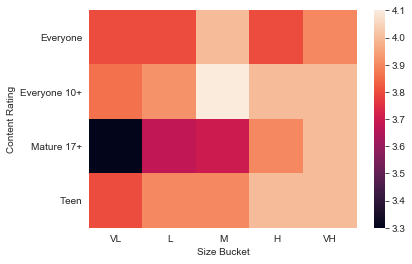

In [106]:
##Plot a heat map
sns.heatmap(res)
p.show()

Here the darkest color has the lowest rating and the lightest color has the highest rating. We are not able to view the rating values. To improve the readability lets use the color maps and some customisations to view the values.

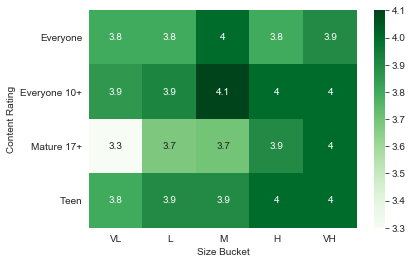

In [107]:
##Apply customisations
sns.heatmap(res,cmap = "Greens", annot=True)
p.show()

Now we have improved readability. Lightest colors refers to lowest values and darkest colors refers to  highest values.Also, annot = True helps to view the rating values. There are various color maps available.Here we have used "Greens"

Question - Replace Content Rating with Review_buckets in the above heat map
Keep the aggregation at minimum value for Rating

In [108]:

##Prepare buckets for the Review column using pd.qcut
inp1["Review Bucket"] = pd.qcut(inp1.Reviews,[0,0.2,0.4,0.6,0.8,1],['VL','L','M','H','VH'])
inp1


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size Bucket,Review Bucket
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,M,L
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,M,L
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,L,VH
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,H,VH
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,VL,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,VL,VL
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,VH,VL
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,VL,VL
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,M,L


We need to create rectangular grid for plotting heat maps.
First,lets create a rectangular grid between Review Bucket and Size Bucket. For that use pivot table

In [109]:
r = pd.pivot_table(data = inp1,index = 'Review Bucket',columns = 'Size Bucket',values = 'Rating',aggfunc = np.min)
r

Size Bucket,VL,L,M,H,VH
Review Bucket,,,,,
VL,1.0,1.0,1.0,1.0,1.0
L,1.6,1.7,1.9,2.1,1.6
M,1.8,1.7,2.5,2.7,2.1
H,2.4,3.3,3.0,2.9,3.1
VH,3.3,3.4,3.2,2.8,3.3


### Session 3: Additional Visualisations

#### Line Plots

- A line plot tries to observe trends using time dependent data.
-  For this part, you'll be using **pd.to_datetime()** function. Check out its documentation:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html


We need to find the average Rating across all the months. For this we need to find the datatype of the Last Updated column.
It is of type Object.Lets convert into datetype and then fetch only the month from it.


In [110]:
## Extract the month from the Last Updated Date

inp1.dtypes

App                 object
Category            object
Rating             float64
Reviews              int32
Size               float64
Installs             int32
Type                object
Price              float64
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Size Bucket       category
Review Bucket     category
dtype: object

In [111]:
#Converting to datetime and fetch only the month from it
inp1['Month_only'] = pd.to_datetime(inp1['Last Updated']).dt.month
inp1


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size Bucket,Review Bucket,Month_only
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,M,L,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,M,L,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,L,VH,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,H,VH,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,VL,L,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,VL,VL,6
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,VH,VL,7
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,VL,VL,7
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,M,L,1


In [112]:
## Find the average Rating across all the months.For this, lets do a group by for months and calculate the average ratings.
inp1.groupby(['Month_only'])["Rating"].mean()

Month_only
1     4.143842
2     4.090385
3     4.107963
4     4.148326
5     4.153375
6     4.172590
7     4.222968
8     4.271086
9     4.041406
10    4.012739
11    4.102685
12    4.065350
Name: Rating, dtype: float64

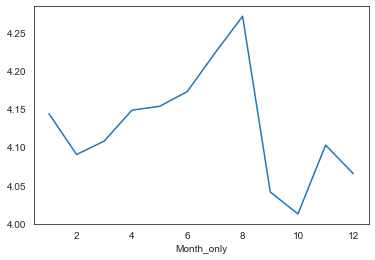

In [113]:
## Plot a line graph
inp1.groupby(['Month_only'])["Rating"].mean().plot()
p.show()

Line charts are more or less utilised only for time-series data. Therefore, you’ll be using them predominantly while working on forecasting and other time series models.

#### Stacked Bar Charts

Earlier, you learnt how to analyse categorical variables using a bar chart. You can also add another categorical variable to the mix and analyse it even further with the help of a stacked bar chart.
- A stacked bar chart breaks down each bar of the bar chart on the basis of a different category
- For example, for the Campaign Response bar chart you saw earlier, the stacked bar chart is also showing the Gender bifurcation as well
 

![Stacked](images\stacked.png)

In [114]:
## Create a pivot table for Content Rating and updated Month with the values set to Installs
pd.pivot_table(data = inp1,index = 'Month_only',columns = 'Content Rating',values = 'Installs',aggfunc = sum)

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Month_only,,,,
1,9.253874e+08,105282000.0,9701210.0,4.415901e+07
2,5.453720e+08,19821000.0,13021500.0,3.959771e+07
3,6.953655e+08,30322510.0,9111100.0,7.985031e+07
4,9.733712e+08,23300000.0,5259000.0,1.616194e+08
5,1.861068e+09,118173500.0,50140100.0,2.026896e+08
6,2.427171e+09,317727100.0,145257200.0,4.157166e+08
7,7.771110e+09,456556000.0,419491910.0,1.943557e+09
8,5.930943e+09,215821000.0,312981700.0,1.257856e+09
9,2.603404e+08,24931100.0,2201010.0,2.248310e+07


In [115]:
##Store the table in a separate variable
r1 = pd.pivot_table(data = inp1,index = 'Month_only',columns = 'Content Rating',values = 'Installs',aggfunc = sum)
r1

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Month_only,,,,
1,9.253874e+08,105282000.0,9701210.0,4.415901e+07
2,5.453720e+08,19821000.0,13021500.0,3.959771e+07
3,6.953655e+08,30322510.0,9111100.0,7.985031e+07
4,9.733712e+08,23300000.0,5259000.0,1.616194e+08
5,1.861068e+09,118173500.0,50140100.0,2.026896e+08
6,2.427171e+09,317727100.0,145257200.0,4.157166e+08
7,7.771110e+09,456556000.0,419491910.0,1.943557e+09
8,5.930943e+09,215821000.0,312981700.0,1.257856e+09
9,2.603404e+08,24931100.0,2201010.0,2.248310e+07


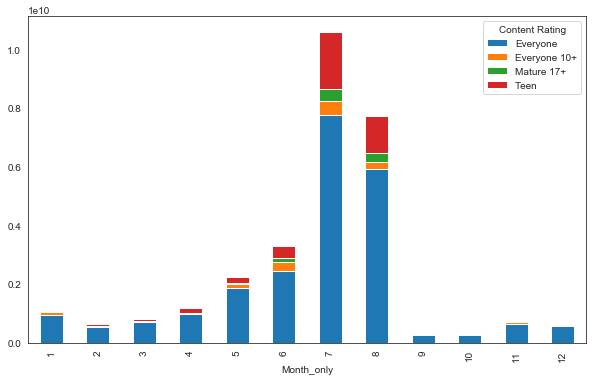

In [116]:
##Plot the stacked bar chart.
r1.plot(kind = "bar",stacked = "True",figsize = [10,6])
p.show()

From the above stacked bar chart we were not able to get any clear idea or any conclusions. In this case let calculate the proportions.

In [117]:
#Calculate the proportions
r2 = r1[["Everyone","Everyone 10+","Mature 17+","Teen"]].apply(lambda x:x/x.sum(),axis = 1)
r2

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Month_only,,,,
1,0.853262,0.097076,0.008945,0.040717
2,0.882747,0.032083,0.021077,0.064093
3,0.853576,0.037222,0.011184,0.098018
4,0.836553,0.020025,0.004520,0.138902
5,0.833785,0.052943,0.022463,0.090808
6,0.734200,0.096110,0.043939,0.125751
7,0.733766,0.043109,0.039609,0.183515
8,0.768496,0.027965,0.040554,0.162985
9,0.839928,0.080434,0.007101,0.072537


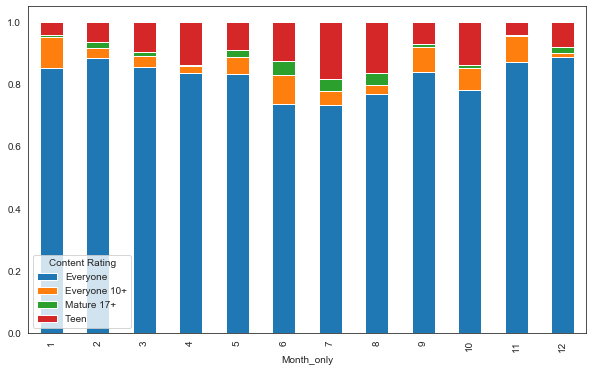

In [118]:
##Plot the stacked bar chart again wrt to the proportions.
r2.plot(kind = "bar",stacked = "True",figsize = [10,6])
p.show()

Now we can get an idea that during the monht of June,July and August "Teens" has highest Installs. Also from the above line graph the Rating of App is also high during the month of June, July and August. In conclusion, we can say that in The U.S these is a term break for college students. So Installs and Rating remains high

#### Plotly

Plotly is a Python library used for creating interactive visual charts. You can take a look at how you can use it to create aesthetic looking plots with a lot of user-friendly functionalities like hover, zoom, etc.

Check out this link for installation and documentation:https://plot.ly/python/getting-started/

#Install plotly
Installed

In [128]:
#Take the table you want to plot in a separate variable
r3 = inp1.groupby(["Month_only"])["Rating"].mean()
r3 = (r3.to_frame()) #converting the series into a dataframe
r3.reset_index(inplace=True)
r3


,Month_only,Rating
0,1,4.143842
1,2,4.090385
2,3,4.107963
3,4,4.148326
4,5,4.153375
5,6,4.172590
6,7,4.222968
7,8,4.271086
8,9,4.041406
9,10,4.012739


In [130]:
#Import the plotly libraries
import plotly.express as px
r3
fig = px.line(r3,x="Month_only",y="Rating",title = "Monthly Rating")
fig.show()

In [122]:
#Prepare the plot
